In [ ]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split as split
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
fdata=pd.read_csv("/content/football.csv")

In [ ]:
data=fdata.copy()

In [ ]:
data

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,Edimilson Fernandes,West+Ham,21,CM,2,5.0,288,4.5,0.40%,38,2.0,Switzerland,0,1,20,0,1
457,Arthur Masuaku,West+Ham,23,LB,3,7.0,199,4.5,0.20%,34,4.0,Congo DR,0,2,20,0,1
458,Sam Byram,West+Ham,23,RB,3,4.5,198,4.5,0.30%,29,1.0,England,0,2,20,0,0
459,Ashley Fletcher,West+Ham,21,CF,1,1.0,412,4.5,5.90%,16,1.0,England,0,1,20,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          461 non-null    object 
 1   club          461 non-null    object 
 2   age           461 non-null    int64  
 3   position      461 non-null    object 
 4   position_cat  461 non-null    int64  
 5   market_value  461 non-null    float64
 6   page_views    461 non-null    int64  
 7   fpl_value     461 non-null    float64
 8   fpl_sel       461 non-null    object 
 9   fpl_points    461 non-null    int64  
 10  region        460 non-null    float64
 11  nationality   461 non-null    object 
 12  new_foreign   461 non-null    int64  
 13  age_cat       461 non-null    int64  
 14  club_id       461 non-null    int64  
 15  big_club      461 non-null    int64  
 16  new_signing   461 non-null    int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 61.4+ KB


In [ ]:
data.describe()

,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,460.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,26.804772,2.180043,11.012039,763.776573,5.447939,57.314534,1.993478,0.034707,3.206074,10.334056,0.303688,0.145336
std,3.961892,1.000061,12.257403,931.805757,1.346695,53.113811,0.957689,0.183236,1.279795,5.726475,0.460349,0.352822
min,17.000000,1.000000,0.050000,3.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,24.000000,1.000000,3.000000,220.000000,4.500000,5.000000,1.000000,0.000000,2.000000,6.000000,0.000000,0.000000
50%,27.000000,2.000000,7.000000,460.000000,5.000000,51.000000,2.000000,0.000000,3.000000,10.000000,0.000000,0.000000
75%,30.000000,3.000000,15.000000,896.000000,5.500000,94.000000,2.000000,0.000000,4.000000,15.000000,1.000000,0.000000
max,38.000000,4.000000,75.000000,7664.000000,12.500000,264.000000,4.000000,1.000000,6.000000,20.000000,1.000000,1.000000


In [ ]:
data["market_value"].max()

75.0

In [ ]:
data["club"].unique()

array(['Arsenal', 'Bournemouth', 'Brighton+and+Hove', 'Burnley',
       'Chelsea', 'Crystal+Palace', 'Everton', 'Huddersfield',
       'Leicester+City', 'Liverpool', 'Manchester+City',
       'Manchester+United', 'Newcastle+United', 'Southampton',
       'Stoke+City', 'Swansea', 'Tottenham', 'Watford', 'West+Brom',
       'West+Ham'], dtype=object)

In [ ]:
dup=data.duplicated()
print(dup.sum())

0


In [ ]:
data.isnull().sum()

name            0
club            0
age             0
position        0
position_cat    0
market_value    0
page_views      0
fpl_value       0
fpl_sel         0
fpl_points      0
region          1
nationality     0
new_foreign     0
age_cat         0
club_id         0
big_club        0
new_signing     0
dtype: int64

In [ ]:
data[data["region"].isnull()]

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
188,Steve Mounie,Huddersfield,22,CF,1,5.5,56,6.0,0.60%,0,NaN,Benin,0,2,8,0,0


In [ ]:
data.loc[188,:]

name            Steve Mounie
club            Huddersfield
age                       22
position                  CF
position_cat               1
market_value             5.5
page_views                56
fpl_value                6.0
fpl_sel                0.60%
fpl_points                 0
region                   NaN
nationality            Benin
new_foreign                0
age_cat                    2
club_id                    8
big_club                   0
new_signing                0
Name: 188, dtype: object

In [ ]:
data['region'] = data['region'].replace(np.nan, 4)

EDA

In [ ]:
data.dtypes

name             object
club             object
age               int64
position         object
position_cat      int64
market_value    float64
page_views        int64
fpl_value       float64
fpl_sel          object
fpl_points        int64
region          float64
nationality      object
new_foreign       int64
age_cat           int64
club_id           int64
big_club          int64
new_signing       int64
dtype: object

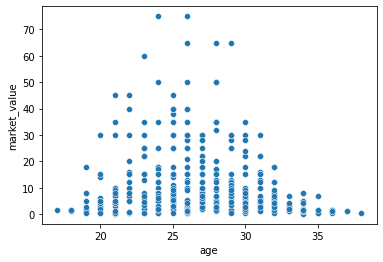

In [ ]:
sns.scatterplot(data=data,x='age',y='market_value') 

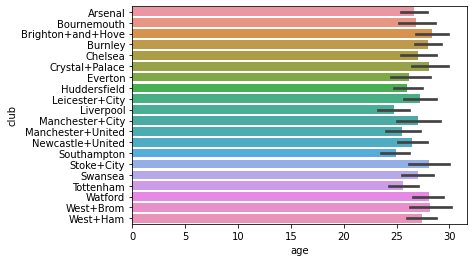

In [ ]:
sns.barplot(data=data,x='age',y='club')  

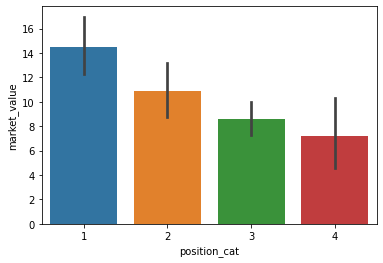

In [ ]:
sns.barplot(data=data,x='position_cat',y='market_value')

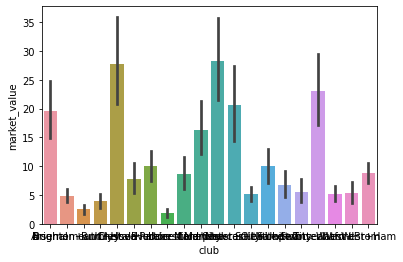

In [ ]:
sns.barplot(data=data,x='club',y='market_value') 

In [ ]:
data.corr(method='pearson')

,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
age,1.000000,0.220678,-0.132396,-0.048682,-0.097659,0.187785,0.080379,-0.125400,0.972199,-0.002868,-0.123566,-0.079190
position_cat,0.220678,1.000000,-0.217637,-0.279432,-0.491800,-0.084682,-0.067439,0.001415,0.196853,-0.016599,0.017915,-0.105127
market_value,-0.132396,-0.217637,1.000000,0.739657,0.788653,0.615155,0.099114,0.098056,-0.117682,-0.046068,0.593483,0.131321
page_views,-0.048682,-0.279432,0.739657,1.000000,0.730640,0.542464,0.027441,-0.049725,-0.041672,-0.092409,0.502982,0.127249
fpl_value,-0.097659,-0.491800,0.788653,0.730640,1.000000,0.618837,0.083883,0.108650,-0.082056,-0.060884,0.423556,0.098314
fpl_points,0.187785,-0.084682,0.615155,0.542464,0.618837,1.000000,-0.011569,-0.204837,0.176572,0.041094,0.280061,0.085720
region,0.080379,-0.067439,0.099114,0.027441,0.083883,-0.011569,1.000000,0.049800,0.085190,0.066483,0.035883,0.174007
new_foreign,-0.125400,0.001415,0.098056,-0.049725,0.108650,-0.204837,0.049800,1.000000,-0.113998,-0.002786,0.080949,-0.078193
age_cat,0.972199,0.196853,-0.117682,-0.041672,-0.082056,0.176572,0.085190,-0.113998,1.000000,-0.004668,-0.113835,-0.076102
club_id,-0.002868,-0.016599,-0.046068,-0.092409,-0.060884,0.041094,0.066483,-0.002786,-0.004668,1.000000,-0.155667,0.134085


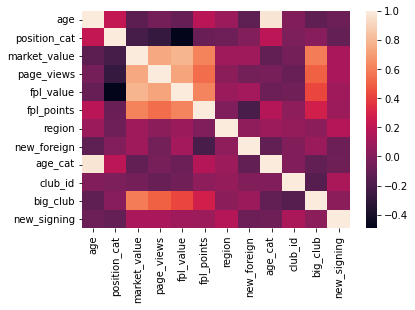

In [ ]:
sns.heatmap(data.corr() , xticklabels= data.corr().columns , yticklabels= data.corr().columns)

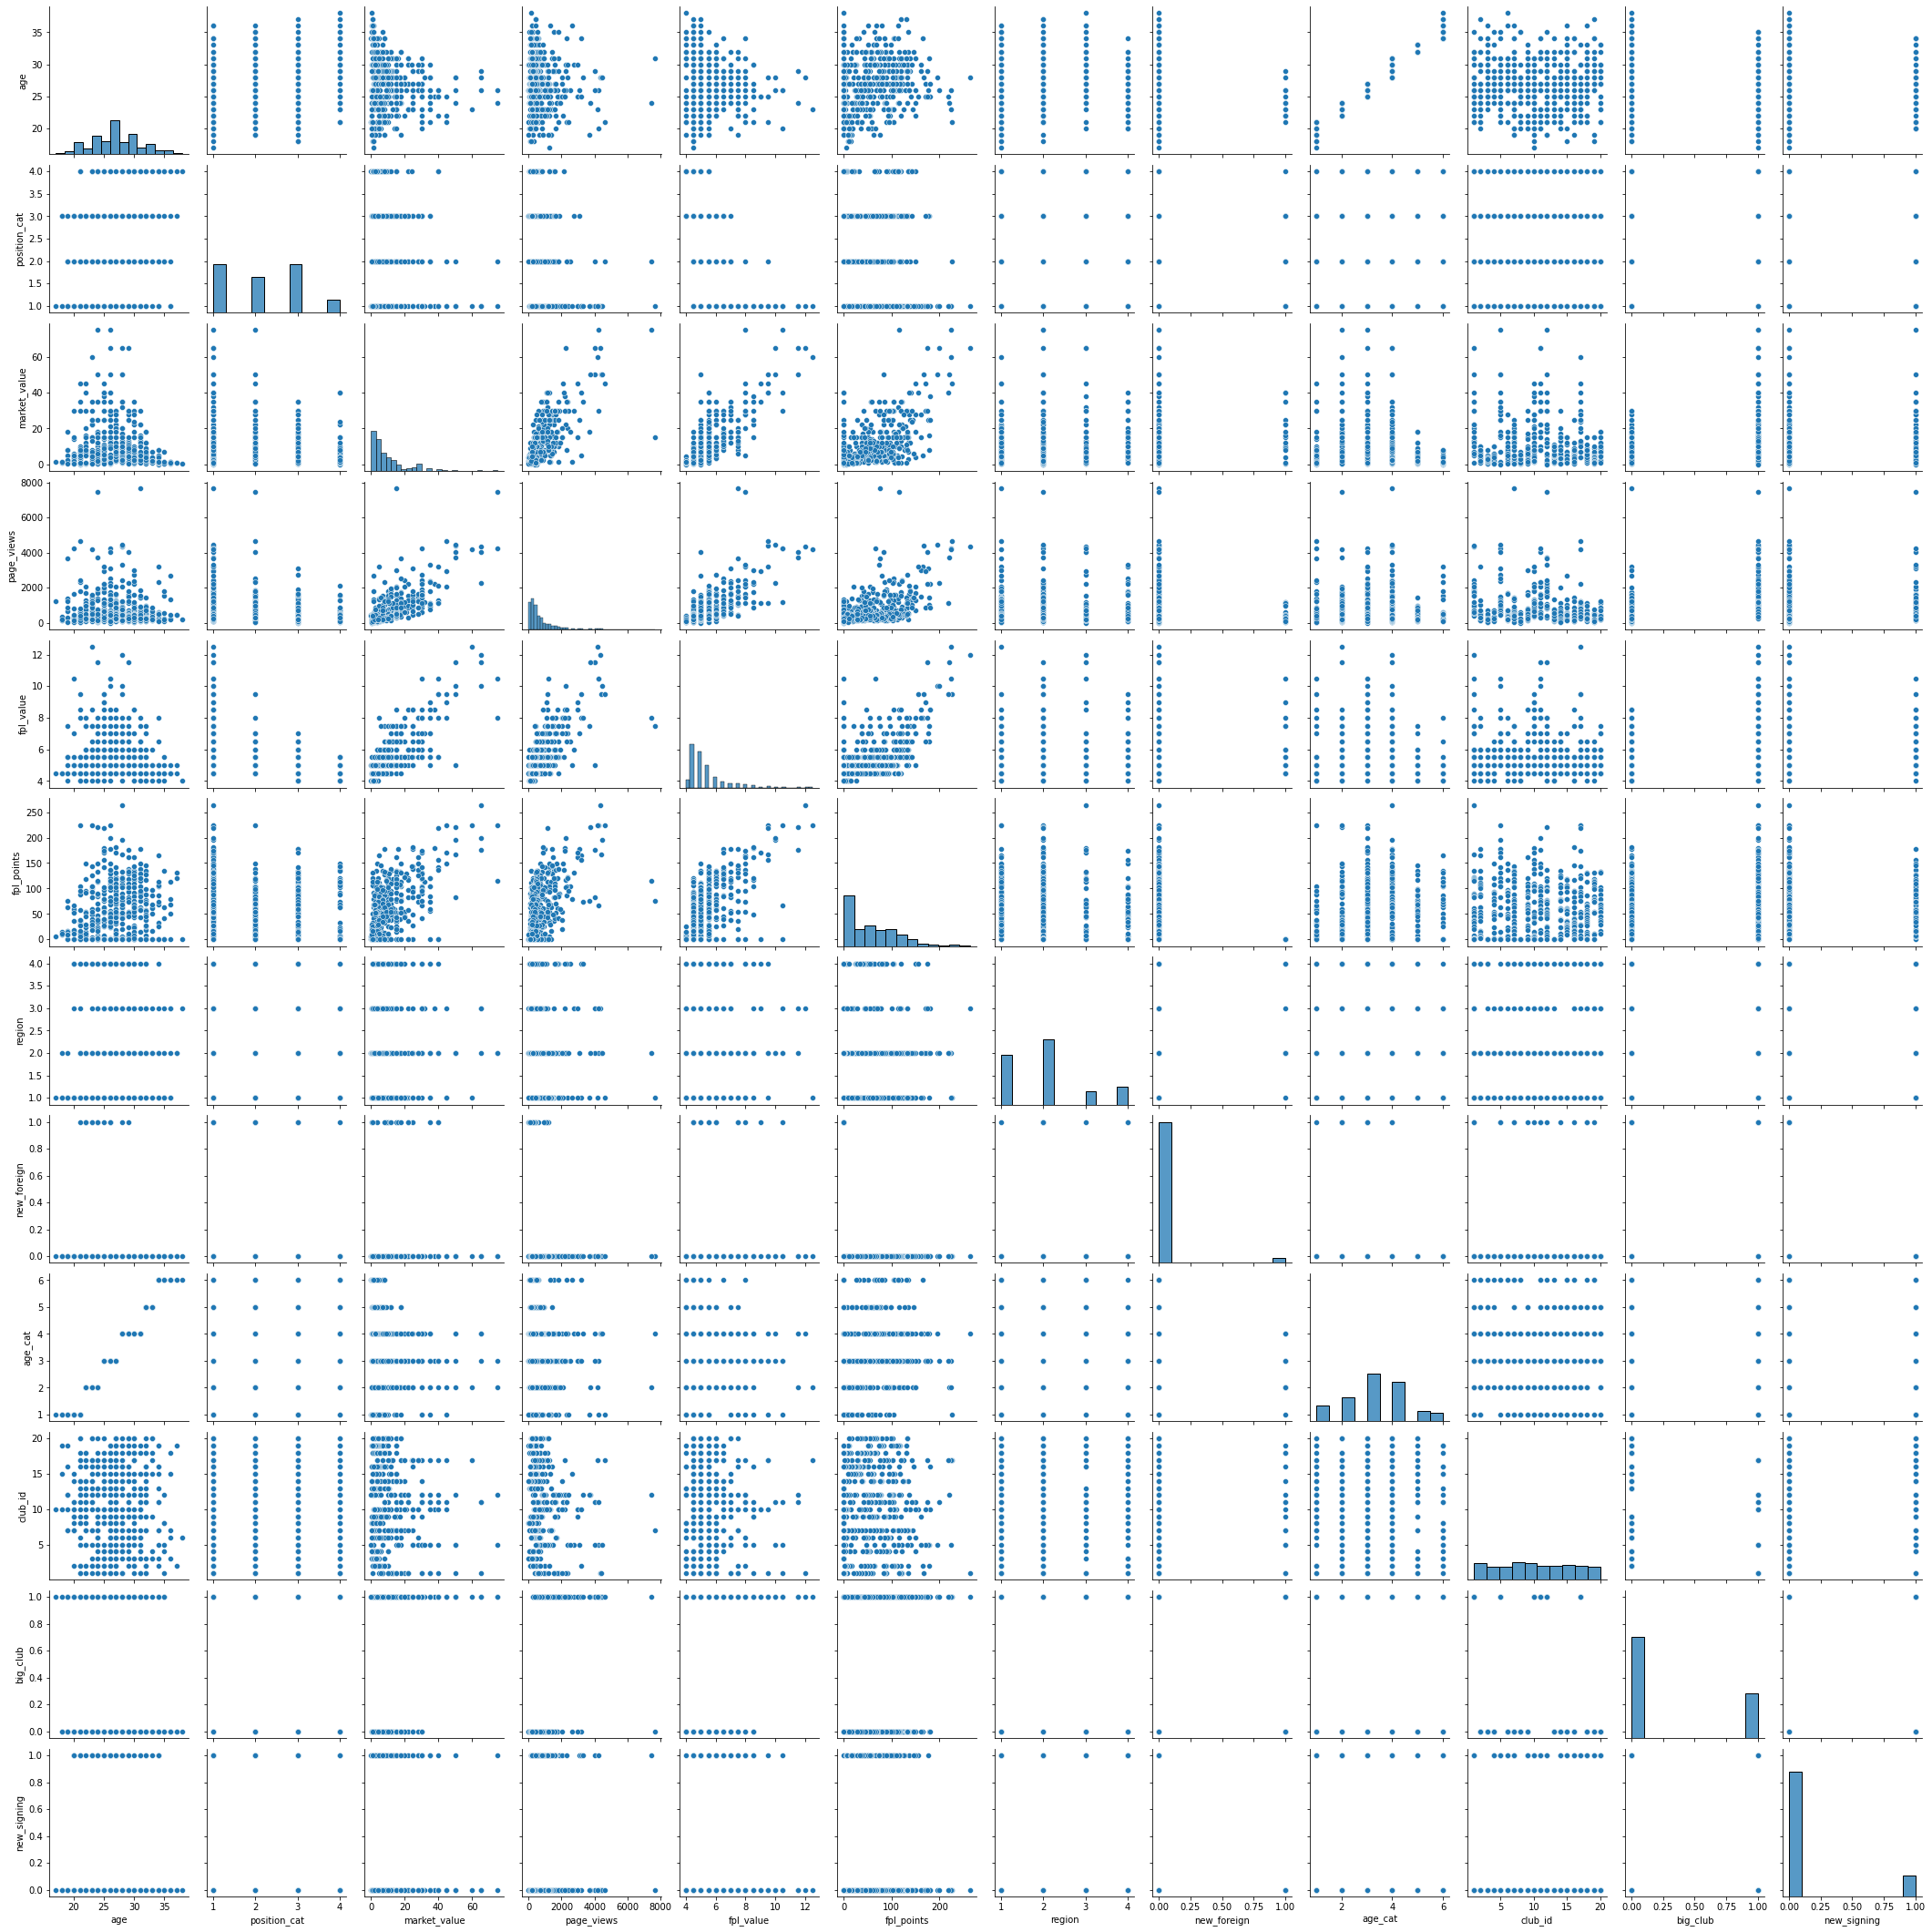

In [ ]:
sns.pairplot(data)

Text(0.5, 1.0, 'Rating')

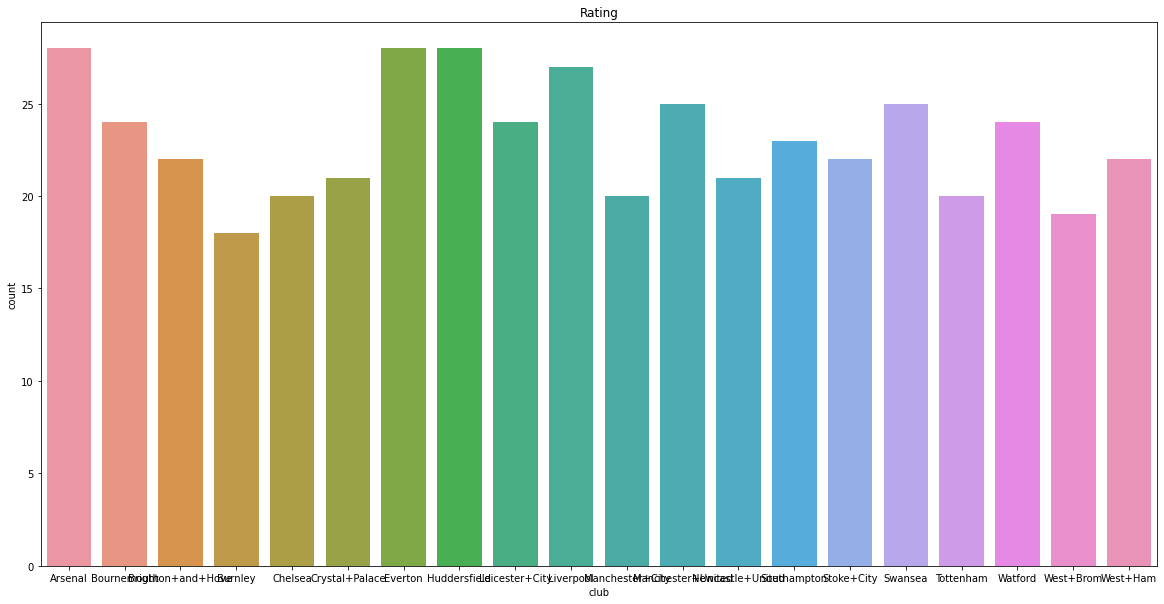

In [ ]:
figsize = (20, 10)
fig, ax = plt.subplots(figsize=figsize)
sns.countplot(x='club',data=data, ax=ax)
plt.title("Rating")

In [ ]:
#data.drop(['name','club','position','nationality','fpl_sel'],axis=1,inplace=True)
data.drop(['fpl_sel'],axis=1,inplace=True)

In [ ]:
X=data.drop("market_value",axis=1)

In [ ]:
Y=data["market_value"]

In [ ]:
X_train, X_test, Y_train, Y_test=split(X, Y, test_size = 0.25, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression as lgr
regressor=lgr()
regressor.fit(X_train, Y_train)

ValueError: ignored

In [ ]:
ypred=regressor.predict(X_test)

In [ ]:
ypred

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test,ypred)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,ypred)